<a href="https://colab.research.google.com/github/juliosdutra/ModelagemPPEQ1019/blob/main/meat_composition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Exemplo de aplica√ß√£o: an√°lise da composi√ß√£o de carnes

O conjunto de dados est√° relacionado com an√°lises de composi√ß√£o de amostras de carne. O objetivo √© fazer uso registros de um "Tecator Infratec Food and Feed Analyzer", na faixa de comprimento de onda 850 - 1050 nm pelo princ√≠pio de transmiss√£o de infravermelho pr√≥ximo, para predi√ß√£o do conte√∫do de √°gua, gordura e prote√≠na da carne. Ent√£o, basicamente, a ideia da modelagem √© evitar o trabalho de medi√ß√£o demorado e depender apenas de colocar a amostra de carne no scanner e obter o conte√∫do estimado de gordura, √°gua e prote√≠na.

Neste conjunto, h√° 215 amostras compostas de:
* 100 canais de espectro de absorb√¢ncia (*features*); e
* 3 vari√°veis dependentes (*targets*): as porcentagens de √°gua, gordura e prote√≠na.

O objetivo da Regress√£o Linear √© modelar a rela√ß√£o de depend√™ncia entre as vari√°veis dependentes (*targets*) e m√∫ltiplas vari√°veis independentes (*features*).

Para mais detalhes, veja uma descri√ß√£o dispon√≠vel em:
https://search.r-project.org/CRAN/refmans/modeldata/html/meats.html

In [ ]:
# Importar as bibliotecas b√°sicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

In [ ]:
# Importar os dados
# URL direta para o arquivo XLS no GitHub
url = "https://raw.githubusercontent.com/juliosdutra/ModelagemPPEQ1019/refs/heads/main/meats.csv"
df = pd.read_csv(url)
df.head()

x_001    x_002    x_003    x_004    x_005    x_006    x_007    x_008  \
0  2.61776  2.61814  2.61859  2.61912  2.61981  2.62071  2.62186  2.62334   
1  2.83454  2.83871  2.84283  2.84705  2.85138  2.85587  2.86060  2.86566   
2  2.58284  2.58458  2.58629  2.58808  2.58996  2.59192  2.59401  2.59627   
3  2.82286  2.82460  2.82630  2.82814  2.83001  2.83192  2.83392  2.83606   
4  2.78813  2.78989  2.79167  2.79350  2.79538  2.79746  2.79984  2.80254   

     x_009    x_010  ...    x_094    x_095    x_096    x_097    x_098  \
0  2.62511  2.62722  ...  2.94013  2.91978  2.89966  2.87964  2.85960   
1  2.87093  2.87661  ...  3.26655  3.25369  3.24045  3.22659  3.21181   
2  2.59873  2.60131  ...  2.65112  2.63262  2.61461  2.59718  2.58034   
3  2.83842  2.84097  ...  2.92576  2.90251  2.87988  2.85794  2.83672   
4  2.80553  2.80890  ...  3.25831  3.23784  3.21765  3.19766  3.17770   

     x_099    x_100  water   fat  protein  
0  2.83940  2.81920   60.5  22.5     16.7  
1  3.19600  3.17942   46.0  40.1     13.5  
2  2.56404  2.54816   71.0   8.4     20.5  
3  2.81617  2.79622   72.8   5.9     20.7  
4  3.15770  3.13753   58.3  25.5     15.5  

[5 rows x 103 columns]

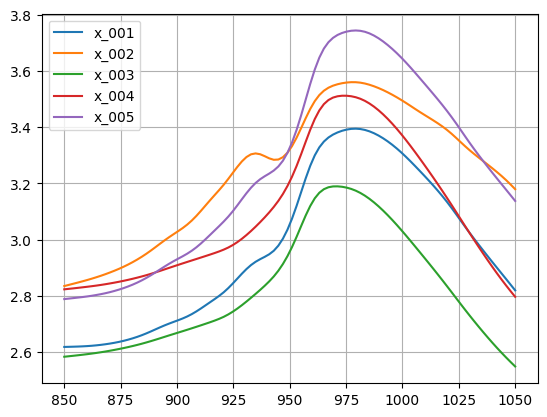

In [ ]:
# Divis√£o dos dados entre vari√°veis independentes (feature) e dependentes (target)
target = ['water', 'fat', 'protein']
X = df.drop(target,axis=1).values  # Vari√°vel independente
y = df[target].values # Vari√°vel dependente

# Visualiza√ß√£o gr√°fica
n, m = X.shape
w = np.linspace(850,1050,m)

for k in range(5): # Plot das 5 primeiras amostras
    plt.plot(w, X[k,:], label = df.columns[k])
plt.legend()
plt.grid();

# Normaliza√ß√£o/Padroniza√ß√£o dos Espectros
Os espectros de absorb√¢ncia podem ter diferentes escalas, ent√£o faz sentido aplicar uma normaliza√ß√£o ou padroniza√ß√£o:

**Padroniza√ß√£o (Z-score normalization)**
Garante que os dados tenham m√©dia 0 e desvio padr√£o 1.

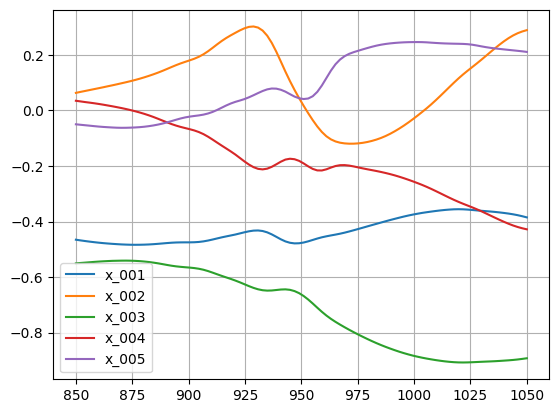

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Normalizando apenas os espectros (n√£o as vari√°veis-alvo)


for k in range(5): # Plot das 5 primeiras amostras
    plt.plot(w, X_scaled[k,:], label = df.columns[k])
plt.legend()
plt.grid();

**Normaliza√ß√£o Min-Max**
Traz os valores para um intervalo de [0,1], √∫til para redes neurais e regress√µes regulares.

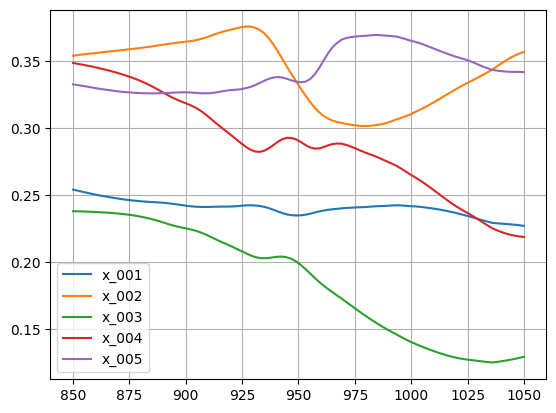

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

for k in range(5): # Plot das 5 primeiras amostras
    plt.plot(w, X_scaled[k,:], label = df.columns[k])
plt.legend()
plt.grid();

# Transforma√ß√µes Espectrais para Melhorar o Modelo

Muitos m√©todos quimiom√©tricos usam pr√©-processamento espectral para remover ru√≠do e melhorar a modelagem. Algumas op√ß√µes incluem:

**Derivadas de Savitzky-Golay**
Ajuda a remover ru√≠do e melhorar a resolu√ß√£o espectral.

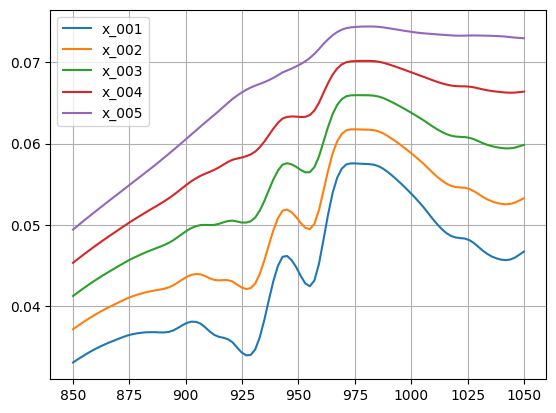

In [ ]:
from scipy.signal import savgol_filter

X_smooth = savgol_filter(X, window_length=11, polyorder=2, deriv=1, axis=0)  # Primeira derivada

for k in range(5): # Plot das 5 primeiras amostras
    plt.plot(w, X_smooth[k,:], label = df.columns[k])
plt.legend()
plt.grid();

**Normaliza√ß√£o por Padr√£o Interno (SNV - Standard Normal Variate)**
Remove varia√ß√µes sistem√°ticas devido √† dispers√£o da luz.

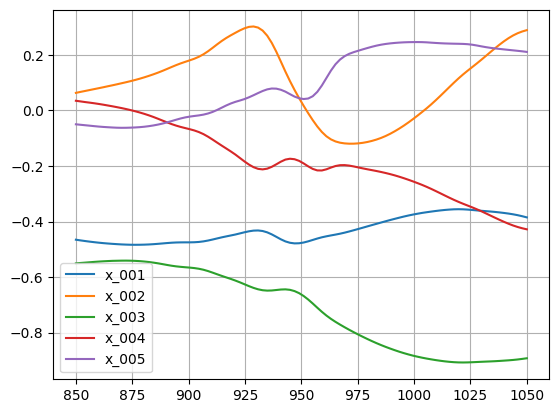

In [ ]:
def snv(input_data):
    return (input_data - np.mean(input_data, axis=0)) / np.std(input_data, axis=0)

X_snv = snv(X)

for k in range(5): # Plot das 5 primeiras amostras
    plt.plot(w, X_snv[k,:], label = df.columns[k])
plt.legend()
plt.grid();


**Transforma√ß√£o de Correla√ß√£o de Detec√ß√£o (MSC - Multiplicative Scatter Correction)**
Reduz varia√ß√µes entre amostras devido a efeitos f√≠sicos.

In [ ]:
def msc(input_data):
    mean_spectrum = np.mean(input_data, axis=0)
    corrected = np.array([np.polyfit(mean_spectrum, spectrum, 1)[0] for spectrum in input_data])
    return corrected

X_msc = msc(X)

# Redu√ß√£o de Dimensionalidade (PCA ou PLSR)
Como temos 100 vari√°veis preditoras, pode ser interessante reduzir a dimensionalidade:

**(a) PCA (An√°lise de Componentes Principais)**
Reduz os espectros para componentes principais que explicam a maior parte da varia√ß√£o nos dados.

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # Reduzindo para 10 componentes principais
X_pca = pca.fit_transform(X_scaled)

print(f"Vari√¢ncia explicada acumulada: {sum(pca.explained_variance_ratio_):.2f}")


Vari√¢ncia explicada acumulada: 1.00


**PLSR (Partial Least Squares Regression)**
M√©todo mais adequado para espectroscopia, pois otimiza a rela√ß√£o entre preditores e alvos.

In [ ]:
from sklearn.cross_decomposition import PLSRegression

pls = PLSRegression(n_components=10)
pls.fit(X_scaled, df.iloc[:, -3:])  # Treinando o modelo para prever gordura, √°gua e prote√≠na


PLSRegression(n_components=10)

# C√ìDIGO COMPLETO

üìå O que esse c√≥digo faz?

1Ô∏è‚É£ Baixa os dados do GitHub

2Ô∏è‚É£ Pr√©-processa os espectros (Z-score ‚Üí SNV ‚Üí Savitzky-Golay)

3Ô∏è‚É£ Divide os dados em treino e teste (80% treino, 20% teste)

4Ô∏è‚É£ Treina um modelo PLSR (com 10 componentes)

5Ô∏è‚É£ Faz previs√µes e avalia o modelo (RMSE e R¬≤)

6Ô∏è‚É£ Gera gr√°ficos predi√ß√£o vs valor real para cada vari√°vel alvo


üí° Dicas para melhorar:

üîπ Ajuste o n√∫mero de componentes PLS (n_components) para otimizar o desempenho

üîπ Teste diferentes par√¢metros de suaviza√ß√£o (Savitzky-Golay)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.signal import savgol_filter

In [ ]:
# üîπ 1Ô∏è‚É£ Importar os dados
url = "https://raw.githubusercontent.com/juliosdutra/ModelagemPPEQ1019/main/meats.csv"
df = pd.read_csv(url)

# Separar as features (espectros) e os targets (composi√ß√£o qu√≠mica)
X = df.iloc[:, :-3].values  # Espectros (100 colunas)
y = df.iloc[:, -3:].values  # Teores de √°gua, gordura e prote√≠na

In [ ]:
# üîπ 2Ô∏è‚É£ Pr√©-processamento

## Padroniza√ß√£o (Z-score)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## SNV (Standard Normal Variate)
def snv(input_data):
    return (input_data - np.mean(input_data, axis=1, keepdims=True)) / np.std(input_data, axis=1, keepdims=True)

X_snv = snv(X_scaled)

## Suaviza√ß√£o e derivadas (Savitzky-Golay)
X_smooth = savgol_filter(X_snv, window_length=11, polyorder=2, deriv=1, axis=1)

In [ ]:
# üîπ 3Ô∏è‚É£ Divis√£o Treino/Teste
X_train, X_test, y_train, y_test = train_test_split(X_smooth, y, test_size=0.2, random_state=42)

# üîπ 4Ô∏è‚É£ Treinamento do modelo PLSR
pls = PLSRegression(n_components=10)  # Ajuste o n√∫mero de componentes
pls.fit(X_train, y_train)

# üîπ 5Ô∏è‚É£ Predi√ß√£o e Valida√ß√£o
y_pred = pls.predict(X_test)

In [ ]:
## C√°lculo das m√©tricas
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"R¬≤: {r2:.4f}")

RMSE: 4.1069
R¬≤: 0.7842


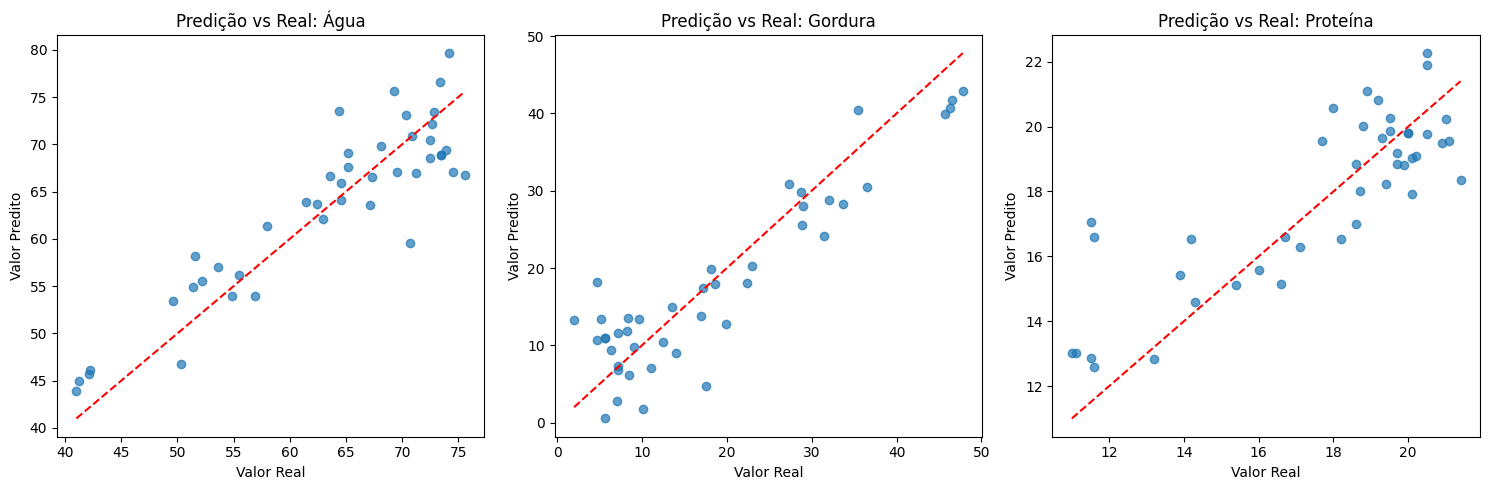

In [ ]:
# üîπ 6Ô∏è‚É£ Visualiza√ß√£o dos Resultados
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
targets = ["√Ågua", "Gordura", "Prote√≠na"]

for i in range(3):
    axes[i].scatter(y_test[:, i], y_pred[:, i], alpha=0.7)
    axes[i].plot([min(y_test[:, i]), max(y_test[:, i])], [min(y_test[:, i]), max(y_test[:, i])], 'r--')
    axes[i].set_title(f"Predi√ß√£o vs Real: {targets[i]}")
    axes[i].set_xlabel("Valor Real")
    axes[i].set_ylabel("Valor Predito")

plt.tight_layout()
plt.show()
